<h1 align="center"> Ilia State University </h1>
<h3 align="center"> Introduction to Machine Learning - Final </h3>

---
__Professor Incharge:__ Camille Van Hoffelen <br>
__Submission By:__ Muhammad Bilal <br>
__Due Date:__ 10<sup>th</sup> of July, 2020 at 1200 hrs


My choice of dataset is `Predicting a person's medical insurance costs using tabular data` from the dataset which is linked [here](https://introduction-to-machine-learning-ilia-university.s3.eu-west-2.amazonaws.com/final_project/medical_insurance.csv).

### Importing the initial essential libraries and taking a look into our dataset.

Importing `Pandas` and `NumPy`:

In [1]:
import pandas as pd
import numpy as np

Loading in our dataset as `df`:

In [2]:
df = pd.read_csv('dataset/medical_insurance.csv')

Taking an initial look at our dataset:

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now looking into the dataset to check for any `missing` values:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As seen above, the dataset seemingly does not have any missing data which is a good start. Health Insurance costs are driven up on factors which affect health. Our dataset includes two such columns:

1. `smoker` which tells us if the current person is a smoker or not. __Smokers__ are more at risk of being ill and hence it is expected that they will have higher insurance costs as compared to __Non Smokers__.


2. `bmi` which refers to __BODY MASS INDEX__ is the ratio of _'body fat'_ to _'height'_ of a person. A BMI helps us to classify people as:
  - __Under-Weight__
  - __Healthy__
  - __Over-Weight__
    
    The most considerably harmful is being Over-Weight as Under-Weight BMIs are still considered healthy in the medical system in most cases. In our case here, for ease and convenience, I have chosen to deal with __Obesity or Over-Weight__ classification as another cost adding factor to an individual's health insurance costs.

To make it easier and simpler to use the data inside the `smoker` column, I am adding another column which represents its '__yes__' and '__no__' values as '__1s__' and '__0s__'. I find it easier to work with a seemingly numerical boolean.

While changes could be made to the existing dataset in the existing column, it isn't a good idea to replace original data values.

In [5]:
## The function below shall check the given "column" for its values. The if statement shall iterate from the start
## until the end and cross reference it with the conditions of our if statement.In case where it is a "yes",
## the array 'values' gets appended with "1". In other cases, the value remains as "0".

def ifsmoker(column):
    values = []
    
    for row in column:
        if row == "yes":
            values.append(1)
            
        else:
            values.append(0)
            
    return values

In [6]:
df["smoker_status"] = ifsmoker(df["smoker"])

##The function is called above and used to add its values into a new column named 'smoker_status'.

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_status
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


As seen above, now I have a better workability on their smoker status as it is clearly denoted in "1s" and "0s". 

Now it is time to factor in another feature which is based on the `bmi`. As the BMIs are given as ratios and not classed already, we need to reference them to a standard scale and then all values above healthy BMI shall be classified as obese.

According to our reliable source in such basic facts `Wikipedia` (link to page [here](https://en.wikipedia.org/wiki/Body_mass_index)) :

"Commonly accepted BMI ranges are underweight (under 18.5 kg/m2), normal weight (18.5 to 25), overweight (25 to 30), and obese (over 30)."

We can make a function that cross-refernces values inside the `bmi` column of our dataset and tell us if they are obese or not considering that now we know obese is any value above `30`.

In [8]:
## The function below shall check the given "column" for its values. The if statement shall iterate from the start
## until the end and cross reference it with the conditions of our if statement.In case where it is the bmi is 
## greater than "30", the array 'values' gets appended with "1". In other cases, the value remains as "0".

def ifobese(column):
    values = []
    
    for row in column:
        if row > 30:
            values.append(1)
            
        else:
            values.append(0)
            
    return values

In [9]:
df["obesity_status"] = ifobese(df["bmi"])

##The function is called above and used to add its values into a new column named 'obesity_status'.

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_status,obesity_status
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0


As you can see above now, our dataset has 2 additional features from the time we intially loaded and read it. These will allow us to easily manipulate the data so we can understand the following question:

<h3 align="center"> How Does Smoking and Obesity Affect A Persons Medical Insurance Cost? </h3>

---

Well, to start understanding this, let's start exploring the relationships in our data. We can begin by comparing our features to the `charges` section which is essentially the cost of medical insurance for that individual.

Starting off with a comparison between `Age` and `Charges`:

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

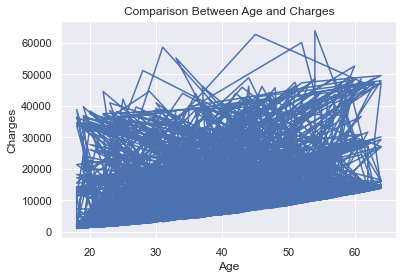

In [12]:
age = df["age"]
charges = df["charges"]

plt.plot(age, charges)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Comparison Between Age and Charges')
plt.show()

__Uh-oh!__ That doesn't seem usable or understandable or represent anything that we can understand. But, usually a messy line plot is a great scatter plot. So let's try visualizing the data with the `.scatter` method now.

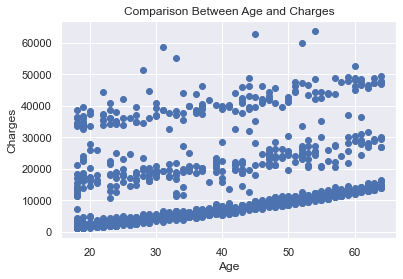

In [13]:
plt.scatter(age, charges)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Comparison Between Age and Charges')
plt.show()

That's more reasonable, as we see here, the cost relatively keeps increasing as the age of the medical insurance holder increases. Let's try all the others now as well and sum our observations in the end if we see any relationship.

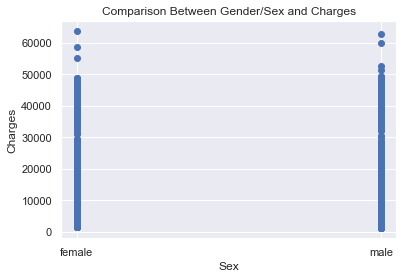

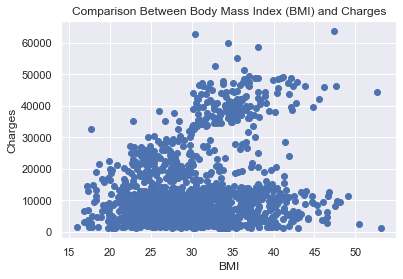

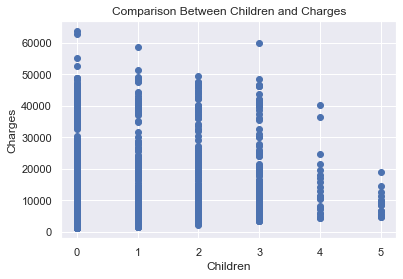

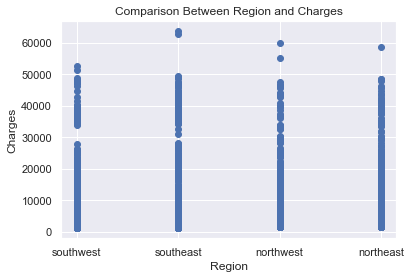

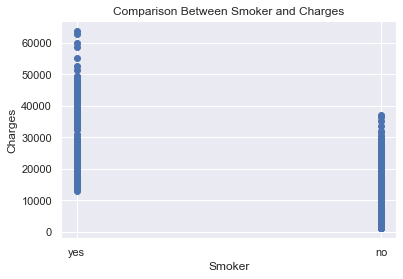

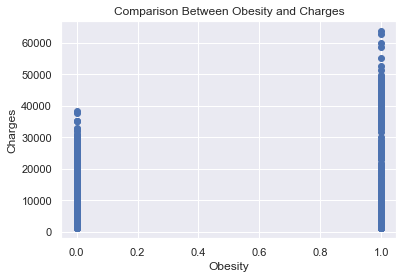

In [14]:
sex = df["sex"]
bmi = df["bmi"]
children = df["children"]
region = df["region"]
smoker = df["smoker"]
smoker_status = df["smoker_status"]
obesity_status = df["obesity_status"]

plt.scatter(sex, charges)
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Comparison Between Gender/Sex and Charges')
plt.show()

plt.scatter(bmi, charges)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Comparison Between Body Mass Index (BMI) and Charges')
plt.show()

plt.scatter(children, charges)
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Comparison Between Children and Charges')
plt.show()

plt.scatter(region, charges)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Comparison Between Region and Charges')
plt.show()

plt.scatter(smoker, charges)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Comparison Between Smoker and Charges')
plt.show()

plt.scatter(obesity_status, charges)
plt.xlabel('Obesity')
plt.ylabel('Charges')
plt.title('Comparison Between Obesity and Charges')
plt.show()

According to the Data Representations above, we can see the following:

- `Age` is an important factor in the medical insurance cost of a person.
- `Sex` is seemingly neutral in the medical insurance cost of a person.
- `BMI` in itself when plotted doesn't show any meaningful output.
- `Children` could be an important factor in the medical insurance cost of a person but the highly varying number of markers on the scatter plot creates doubts in this case.
- `Smoker` is an important factor in the medical insurance cost of a person. `Smoker_Status` would present the same chart but as "__1__" and "__0__" instead of "__YES__" and "__NO__".
- `Obesity_Status` is an important factor in the medical insurance cost of a person.

Hence, in our case, let's go with the obvious features with relations. They shall be `Age`, `Smoker / Smoker_Status` and `Obesity_Status`

---

The __`DataFrame`__ shall now be split into two sets, __`Training Set`__ and __`Test Set`__. The datasets shall be divided into an 80/20 ratio as shown below:

In [15]:
from sklearn.model_selection import train_test_split

# Importing Train_Test_Split which is allows us to split our dataframe into various sets in various proportions 
# and variety.

In [16]:
train_df, test_df = train_test_split(df, test_size=0.20, random_state=777)
print(f'Total Size of Dataframe: {len(df)} | Size of Training Set: {len(train_df)} | Size of Test Set: {len(test_df)}')

Total Size of Dataframe: 1338 | Size of Training Set: 1070 | Size of Test Set: 268


Exporting the Training and Test sets to `.csv` files. The test set shall be set aside so it's not used during our model training and development process.

In [17]:
train_df.to_csv('dataset/medical_insurance_training_set.csv', index=False)
test_df.to_csv('dataset/medical_insurance_test_set.csv', index=False)

Now, we shall read our training set and  it will be the main `DataFrame` of our workflow. It shall also be furthur split into a __`validation`__ set. This validation set shall not be saved on the disk as it can always be reused without affecting the predicitons of our models.

In [18]:
df = pd.read_csv('dataset/medical_insurance_training_set.csv')
train_df, val_df = train_test_split(df, test_size=0.20, random_state=4242)
print(f'Size of Training Set: {len(train_df)} | Size of Validation Set: {len(val_df)}')

Size of Training Set: 856 | Size of Validation Set: 214


---

## Model 1: Linear Regression

The reason to choose __Linear Regression__ over __Logistic Regression__ is the fact that our prediction is `Cost Of Medical Insurance` which is a continuous value.

In [19]:
from sklearn.linear_model import LinearRegression

# Importing the Linear Regression Model.

Now, we create variables which shall house our `feautures` and `label` respectively.
- `Features` : Independant Variables which are integral to our prediction.
- `Label` : A Dependant Variable based on the relationships and patterns of our independant variable.

In [20]:
def features(df):
    X = df[['age', 'smoker_status', 'obesity_status']].values
    return X

def label(df):
    Y = df['charges'].values
    return Y

# Function written above to Create Features and Labels from a chosen dataframe "df".

In [21]:
features_training = features(train_df)
label_training = label(train_df)

# Features and Label made for our Training Set.

features_validation = features(val_df)
label_validation = label(val_df)

# Features and Label made for our Validation Set.

In [22]:
linear_reg = LinearRegression().fit(features_training, label_training)

#Training our Linear Regression Model with the Training Set.

We can now check the `accuracy` of the Linear Regression model by using the Sklearn's metrics and our validation set.

In [23]:
linear_reg.score(features_validation, label_validation)

0.7019433513760993

That score puts us upto an approximate of __`70%`__ accuracy which is quite good. But let's train some more advanced models.

---

## Model 2: Random Forest Regression

Although the Random Forest Model is a great classifier, it can also be used for regression if we factor `variance reduction` instead of `homogeneity metrics` during the process of spliting, creating and assigning numerical values to the nodes.

The first step would be to make and design our `decision tree` which would be done as follows. Our features and labels are already designed and can be used here. Some essentials to the __`Random Forest Regressor`__ are as follows and their values have been set at:

- `Criterion` : The criteria used to implement regression, I have used __MSE__ which is __Mean Squared Error__. It is the default and need not be specified exclusively.

- `Random State` : The randomness of the bootstrap for the samples used for building trees.

- `N-Estimators` : The number of trees in our randomized forest.

- `Minimum Samples per Leaf` : As the name suggests...

The values were for these parameters chosen after tinkering around with the model to attain the best result with our training set.

In [24]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state = 322, n_estimators = 150, min_samples_leaf = 8)
random_forest = rfr.fit(features_training, label_training)

#Training our Random Forest Regressor Model with the Training Set.

We can now check the accuracy of the Random Forest model by using the Sklearn's metrics and our validation set.

In [25]:
random_forest.score(features_validation, label_validation)

0.8000052406626896

That score puts us upto an approximate of __`79%-80%`__ accuracy which is even better. But we can still train one more model which can be more accurate and precise on predictions.

---

## Model 2: Neural Networks

Didn't you hear the orders to `BRING OUT THE BIG GUNS!` Let's respond back with a `SIR YES SIR!`  

So the last model we can use then is a __`Neural Network`__. Inorder to make a Neural Network, we will use:

- `Keras` which is an open source Neural Network API 

- `TensorFlow` as its backend. 

- `Sequential` is a model allowing stacking of layers in a Neural Network.

- `Dense` allows to instate and manipulate the layers in a Neural Network.

In [29]:
from keras.models import Sequential
from keras.layers import Dense

nn_model = Sequential([
    Dense(19, activation='relu', input_dim = 3),
    Dense(19, activation='relu'),
    Dense(19, activation='relu'),
    Dense(1)
])

nn_model.compile(
    loss = 'mean_squared_error',
    optimizer = 'adam'
)

import tensorflow as tf

np.random.seed(322)
tf.random.set_seed(200)
history = nn_model.fit(features_training, label_training, epochs=700)

Epoch 1/700
27/27 [==============================] - 0s 929us/step - loss: 305308640.0000
Epoch 2/700
27/27 [==============================] - 0s 960us/step - loss: 304839776.0000
Epoch 3/700
27/27 [==============================] - 0s 776us/step - loss: 303988096.0000
Epoch 4/700
27/27 [==============================] - 0s 896us/step - loss: 302380768.0000
Epoch 5/700
27/27 [==============================] - 0s 839us/step - loss: 299380896.0000
Epoch 6/700
27/27 [==============================] - 0s 797us/step - loss: 294258592.0000
Epoch 7/700
27/27 [==============================] - 0s 845us/step - loss: 285882048.0000
Epoch 8/700
27/27 [==============================] - 0s 1ms/step - loss: 273344480.0000
Epoch 9/700
27/27 [==============================] - 0s 860us/step - loss: 255435104.0000
Epoch 10/700
27/27 [==============================] - 0s 810us/step - loss: 232002240.0000
Epoch 11/700
27/27 [==============================] - 0s 844us/step - loss: 205527008.0000
Epoch 12/7

27/27 [==============================] - 0s 827us/step - loss: 117942264.0000
Epoch 92/700
27/27 [==============================] - 0s 768us/step - loss: 117773264.0000
Epoch 93/700
27/27 [==============================] - 0s 807us/step - loss: 117667848.0000
Epoch 94/700
27/27 [==============================] - 0s 843us/step - loss: 117504840.0000
Epoch 95/700
27/27 [==============================] - 0s 783us/step - loss: 117324032.0000
Epoch 96/700
27/27 [==============================] - 0s 798us/step - loss: 117180320.0000
Epoch 97/700
27/27 [==============================] - 0s 778us/step - loss: 117123304.0000
Epoch 98/700
27/27 [==============================] - 0s 837us/step - loss: 116876728.0000
Epoch 99/700
27/27 [==============================] - 0s 729us/step - loss: 116705440.0000
Epoch 100/700
27/27 [==============================] - 0s 815us/step - loss: 116524520.0000
Epoch 101/700
27/27 [==============================] - 0s 765us/step - loss: 116382784.0000
Epoch 102/

27/27 [==============================] - 0s 812us/step - loss: 69100680.0000
Epoch 181/700
27/27 [==============================] - 0s 872us/step - loss: 67451744.0000
Epoch 182/700
27/27 [==============================] - 0s 831us/step - loss: 65879748.0000
Epoch 183/700
27/27 [==============================] - 0s 824us/step - loss: 64293892.0000
Epoch 184/700
27/27 [==============================] - 0s 849us/step - loss: 62702368.0000
Epoch 185/700
27/27 [==============================] - 0s 904us/step - loss: 61317168.0000
Epoch 186/700
27/27 [==============================] - 0s 849us/step - loss: 59637388.0000
Epoch 187/700
27/27 [==============================] - 0s 813us/step - loss: 58191720.0000
Epoch 188/700
27/27 [==============================] - 0s 838us/step - loss: 56595316.0000
Epoch 189/700
27/27 [==============================] - 0s 875us/step - loss: 55319432.0000
Epoch 190/700
27/27 [==============================] - 0s 830us/step - loss: 53546708.0000
Epoch 191/700

27/27 [==============================] - 0s 782us/step - loss: 26634818.0000
Epoch 271/700
27/27 [==============================] - 0s 803us/step - loss: 26766326.0000
Epoch 272/700
27/27 [==============================] - 0s 824us/step - loss: 26538122.0000
Epoch 273/700
27/27 [==============================] - 0s 798us/step - loss: 26424998.0000
Epoch 274/700
27/27 [==============================] - 0s 801us/step - loss: 26430480.0000
Epoch 275/700
27/27 [==============================] - 0s 908us/step - loss: 26299830.0000
Epoch 276/700
27/27 [==============================] - 0s 786us/step - loss: 26223310.0000
Epoch 277/700
27/27 [==============================] - 0s 887us/step - loss: 26184444.0000
Epoch 278/700
27/27 [==============================] - 0s 840us/step - loss: 26138576.0000
Epoch 279/700
27/27 [==============================] - 0s 901us/step - loss: 26112636.0000
Epoch 280/700
27/27 [==============================] - 0s 813us/step - loss: 26016154.0000
Epoch 281/700

27/27 [==============================] - 0s 841us/step - loss: 21561294.0000
Epoch 361/700
27/27 [==============================] - 0s 929us/step - loss: 21496056.0000
Epoch 362/700
27/27 [==============================] - 0s 826us/step - loss: 21456458.0000
Epoch 363/700
27/27 [==============================] - 0s 906us/step - loss: 21471504.0000
Epoch 364/700
27/27 [==============================] - 0s 846us/step - loss: 21374192.0000
Epoch 365/700
27/27 [==============================] - 0s 805us/step - loss: 21335024.0000
Epoch 366/700
27/27 [==============================] - 0s 793us/step - loss: 21364966.0000
Epoch 367/700
27/27 [==============================] - 0s 891us/step - loss: 21287664.0000
Epoch 368/700
27/27 [==============================] - 0s 799us/step - loss: 21207150.0000
Epoch 369/700
27/27 [==============================] - 0s 838us/step - loss: 21205098.0000
Epoch 370/700
27/27 [==============================] - 0s 846us/step - loss: 21108114.0000
Epoch 371/700

27/27 [==============================] - 0s 709us/step - loss: 19018710.0000
Epoch 451/700
27/27 [==============================] - 0s 834us/step - loss: 19041118.0000
Epoch 452/700
27/27 [==============================] - 0s 793us/step - loss: 19095144.0000
Epoch 453/700
27/27 [==============================] - 0s 731us/step - loss: 18973454.0000
Epoch 454/700
27/27 [==============================] - 0s 777us/step - loss: 18924008.0000
Epoch 455/700
27/27 [==============================] - 0s 742us/step - loss: 18882640.0000
Epoch 456/700
27/27 [==============================] - 0s 778us/step - loss: 18871650.0000
Epoch 457/700
27/27 [==============================] - 0s 776us/step - loss: 18886140.0000
Epoch 458/700
27/27 [==============================] - 0s 731us/step - loss: 18886940.0000
Epoch 459/700
27/27 [==============================] - 0s 756us/step - loss: 18857526.0000
Epoch 460/700
27/27 [==============================] - 0s 754us/step - loss: 18820048.0000
Epoch 461/700

27/27 [==============================] - 0s 797us/step - loss: 18403686.0000
Epoch 540/700
27/27 [==============================] - 0s 886us/step - loss: 18316052.0000
Epoch 541/700
27/27 [==============================] - 0s 907us/step - loss: 18311278.0000
Epoch 542/700
27/27 [==============================] - 0s 871us/step - loss: 18333420.0000
Epoch 543/700
27/27 [==============================] - 0s 857us/step - loss: 18313036.0000
Epoch 544/700
27/27 [==============================] - 0s 862us/step - loss: 18316076.0000
Epoch 545/700
27/27 [==============================] - 0s 833us/step - loss: 18267592.0000
Epoch 546/700
27/27 [==============================] - 0s 923us/step - loss: 18325336.0000
Epoch 547/700
27/27 [==============================] - 0s 843us/step - loss: 18291142.0000
Epoch 548/700
27/27 [==============================] - 0s 845us/step - loss: 18335218.0000
Epoch 549/700
27/27 [==============================] - 0s 869us/step - loss: 18270840.0000
Epoch 550/700

27/27 [==============================] - 0s 803us/step - loss: 18216042.0000
Epoch 630/700
27/27 [==============================] - 0s 889us/step - loss: 18179286.0000
Epoch 631/700
27/27 [==============================] - 0s 805us/step - loss: 18202718.0000
Epoch 632/700
27/27 [==============================] - 0s 879us/step - loss: 18188504.0000
Epoch 633/700
27/27 [==============================] - 0s 875us/step - loss: 18195036.0000
Epoch 634/700
27/27 [==============================] - 0s 829us/step - loss: 18231168.0000
Epoch 635/700
27/27 [==============================] - 0s 875us/step - loss: 18175338.0000
Epoch 636/700
27/27 [==============================] - 0s 806us/step - loss: 18170650.0000
Epoch 637/700
27/27 [==============================] - 0s 830us/step - loss: 18208878.0000
Epoch 638/700
27/27 [==============================] - 0s 801us/step - loss: 18310398.0000
Epoch 639/700
27/27 [==============================] - 0s 949us/step - loss: 18162616.0000
Epoch 640/700

Text(0.5, 1.0, 'Loss Curve Plot')

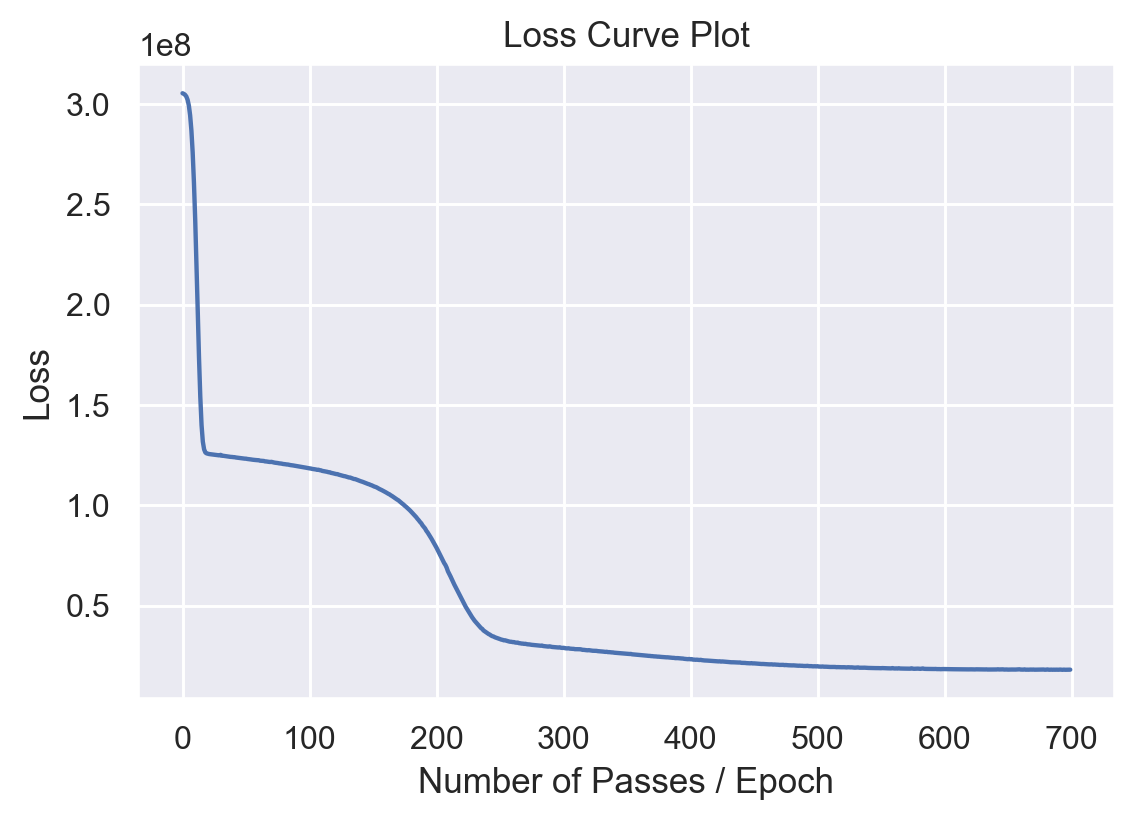

In [27]:
fig = plt.figure(dpi = 210)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'])
ax.set_xlabel('Number of Passes / Epoch')
ax.set_ylabel('Loss')
ax.set_title('Loss Curve Plot')

Now to get predictions and the accuracy of the predictions. using the `R2` score of the training and validation set.

In [40]:
from sklearn.metrics import r2_score

training_set_predictions_nn = nn_model.predict(features_training)
validation_set_predictions_nn = nn_model.predict(features_validation)

print("The R2 score on the Training Set is:\t{:0.3f}".format(r2_score(label_training, training_set_predictions_nn)))
print("The R2 score on the Validation Set is:\t{:0.3f}".format(r2_score(label_validation, validation_set_predictions_nn)))

The R2 score on the Training Set is:	0.870
The R2 score on the Validation Set is:	0.802


So according to the `R2` scores that we get, our neural network has an efficiency of approximately __`80%-87%`__. I think that's pretty good.

Generally we can see that, the more complex a network becomes, the more variables and factors it takes, the higher our accuracy gets. Finally, let's get the metrics on the `test` set that we had put away in the start.

In [46]:
test_df = pd.read_csv('dataset/medical_insurance_test_set.csv')

features_test = features(test_df)
label_test = label(test_df)

lr_test_accuracy = linear_reg.score(features_test, label_test)
rfr_test_accuracy = random_forest.score(features_test, label_test)

test_set_predictions_nn = nn_model.predict(features_test)
nn_test_accuracy = r2_score(label_test, test_set_predictions_nn)

print("The Accuracy of Linear Regression on Test Set is:\t{:0.3f}".format(lr_test_accuracy))
print("The Accuracy of Random Forest based Regression on Test Set is:\t{:0.3f}".format(rfr_test_accuracy))
print("The Accuracy of Neural Network based Regression on Test Set is:\t{:0.3f}".format(nn_test_accuracy))

The Accuracy of Linear Regression on Test Set is:	0.770
The Accuracy of Random Forest based Regression on Test Set is:	0.869
The Accuracy of Neural Network based Regression on Test Set is:	0.877


In regards to this, the best model suiting the regressional prediction task would be our `Neural Network` but the `Random Forest Regressor` is also pretty close.

---

<h2 align="center">END OF FINAL PROJECT</h2>
<h5 align="center"> Version Number: 7.0 | (First Commit as Completed Project)</h5>